<a href="https://colab.research.google.com/github/Wikanda-Hongboonmee/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

## **1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data**

In [99]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import matplotlib

In [100]:
Name = 'วิกานดา หงษ์บุญมี'
ID = '6230207642'

In [101]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [102]:
Data = DataGenerator(Name,ID)

020:30:17


In [103]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.158735,5.690950,4.721809,6.845420,-8.818586,8.674218,9.817295,-3.479546,4.282967,-0.384355,-0.777516,3.675601,8.829940,6.405371,9.966592,3.992198,-8.064268,6.985899,-3.773405,4.839581,8.553680,-0.406223,6.176259,9.658190,9.726215,-4.928476,-5.672280,-6.643199,0.836293,7.008406,11.381901,37.042030
1,0.237897,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368,-17.417686,-49.091842
2,4.866806,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404,16.837979,20.292018
3,-1.136705,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941,-5.428770,43.144703
4,-1.028214,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333,10.390004,-19.656667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.209858,-2.107553,-4.876959,10.332166,0.019237,4.050258,-7.719833,5.508394,3.089267,5.008145,6.739258,5.463149,-1.630533,7.428161,-10.264293,7.334081,5.689646,-0.106500,2.801250,10.591213,-1.641509,-0.452060,-0.190323,5.139647,-9.441470,-8.238742,-8.528449,7.575231,-3.882827,2.627791,-4.215105,15.138955
9996,0.820607,3.711509,-4.954779,-3.238819,5.206296,-8.180974,-4.673332,-6.915658,-4.080469,3.522967,-8.631682,-1.238047,2.032672,-0.882564,-3.215082,3.016409,7.209913,-1.716118,-9.207724,8.560131,6.654362,-3.806772,4.960512,0.399443,4.292408,-9.222095,-9.273189,10.454157,7.079641,-7.743286,7.423018,-36.716428
9997,-10.583808,4.730278,-1.744426,-9.567553,-4.061406,7.446723,-5.974800,-7.825554,-4.524337,9.447843,3.253149,1.498652,1.186343,6.623139,-0.089589,3.669097,5.374887,8.916595,-9.863856,-5.804452,4.260478,3.077116,-4.209442,3.385056,2.103282,-5.786865,5.315729,-6.066785,8.830470,-11.027183,9.460556,-53.135914
9998,1.642318,2.744377,2.768039,7.493199,-3.545052,-9.842654,7.303738,6.927084,-0.353955,7.699033,-2.400825,8.442161,3.262577,1.571756,10.392827,9.759724,8.022491,-3.123120,-10.138046,9.233163,-8.774336,-3.707826,-3.129864,9.677015,-7.495096,-4.406123,-1.974531,-7.448938,1.370353,-8.520655,5.488755,-40.603276


ตรวจสอบขนาดของข้อมูลว่ามี Data กี่ตัวและมีกี่ Dimention

In [104]:
Data.shape # ดูขนาดของข้อมูลว่ามีกี่ Dimention (32 Dimention)

(10000, 32)

### **ตรวจสอบว่าระหว่างคอลัมน์มี correlation กันมากน้อยเพียงใดด้วย Numpy**

เราต้องการลด Dimention ของข้อมูล ดังนั้น เมื่อหาค่า correlation ออกมาแล้วมีข้อมูลตัวใดที่มีค่า correlation = 1 เราจะลบออก เพื่อไม่ให้เกิดการซ้ำซ้อนของข้อมูล

In [105]:
import numpy as np #ก่อนจะ import Package Numpy จะต้องลบข้อมูลที่เป็นตัวอักษรออกก่อน เนื่องจาก Package นี้ทำกับข้อมูลที่เป็นตัวอักษรไม่ได้

In [106]:
corr = np.corrcoef(Data.to_numpy().T) 

In [107]:
corr.shape

(32, 32)

In [108]:
corr # คอลัมน์ไหนมีความสัมพันธ์กันเกือบ 1 แสดงว่ามีความสัมพันธ์กันมาก หรือข้อมูลอาจจะเป็นตัวเดียวกัน

array([[ 1.        ,  0.06051125,  0.15017179, ...,  0.30892884,
         0.06051125,  0.30892884],
       [ 0.06051125,  1.        ,  0.16448426, ...,  0.07884698,
         1.        ,  0.07884698],
       [ 0.15017179,  0.16448426,  1.        , ..., -0.20282071,
         0.16448426, -0.20282071],
       ...,
       [ 0.30892884,  0.07884698, -0.20282071, ...,  1.        ,
         0.07884698,  1.        ],
       [ 0.06051125,  1.        ,  0.16448426, ...,  0.07884698,
         1.        ,  0.07884698],
       [ 0.30892884,  0.07884698, -0.20282071, ...,  1.        ,
         0.07884698,  1.        ]])

In [109]:
for i in range(corr.shape[0]) :
  for j in range(corr.shape[1]) :
    if (i != j) and (corr[i,j] == 1.0) : # ไม่เอาคอลัมน์ที่เลขซ้ำกัน เช่น 1,1 (i=j) 
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0


In [110]:
Data.iloc[:5,0:32] # ลองเรียกดูคอลัมน์ที่ 1 กับ 32 จากข้างบนผลบอกว่าคอลัมน์ที่ 1 กับ 30 มีค่า correlation = 1.0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.158735,5.690950,4.721809,6.845420,-8.818586,8.674218,9.817295,-3.479546,4.282967,-0.384355,-0.777516,3.675601,8.829940,6.405371,9.966592,3.992198,-8.064268,6.985899,-3.773405,4.839581,8.553680,-0.406223,6.176259,9.658190,9.726215,-4.928476,-5.672280,-6.643199,0.836293,7.008406,11.381901,37.042030
1,0.237897,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368,-17.417686,-49.091842
2,4.866806,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404,16.837979,20.292018
3,-1.136705,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941,-5.428770,43.144703
4,-1.028214,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333,10.390004,-19.656667


plot กราฟดู ถ้ากราฟเป็นเส้นตรงแสดงว่าข้อมูลมันซ้ำกัน เป็นค่าเดียวกัน ดังนั้นต้องทำการลบคอลัมน์นั้นออก

In [111]:
from matplotlib import pyplot as plt

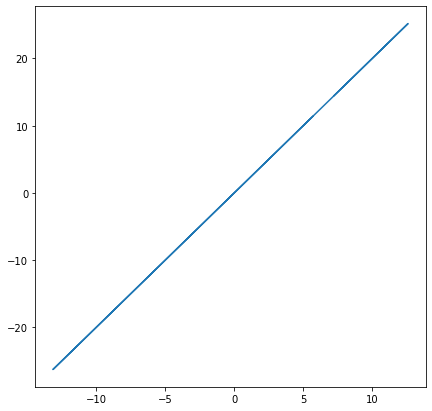

In [118]:
matplotlib.rcParams['figure.figsize']=[7,7]
plt.plot(Data.iloc[:,1],Data.iloc[:,30])

หลังจากพบว่ามีข้อมูลตัวใดบ้างที่มีค่า correlation เป็น 1 เราจะทำการลบข้อมูลดังกล่าวออก

## **2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**

**Import**

In [133]:
#Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean 
from sklearn.cluster import KMeans

**Define**

In [134]:
kmeans = KMeans(n_clusters= 3) #Defind กำหนดค่า k ที่เราต้องการ 
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เนื่องจาก kmean มี defult)

**Fit - Transform**

คำนวณหาจุด cluter centers ของข้อมูล Data ด้วยวิธี K-means clustering

In [135]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [136]:
kmeans.cluster_centers_

array([[  2.38570013,  -3.55048966,  -0.32400704,   4.42755616,
         -1.6258169 ,   6.10699732,   4.72011989,  -1.98533052,
         -2.96378556,  -2.10680713,   2.52876938,  -0.47734385,
          1.46707661,   2.82040179,   5.93317781,   1.8229728 ,
         -0.3034035 ,   3.13664195,   5.11441409,  -0.44402306,
          0.54738871,   2.01444337,   3.89920163,   1.43979966,
          6.15088301,   0.28836908,  -1.0935284 ,   0.94110678,
         -0.97120011,   7.10513977,  -7.10097932,  37.52569885],
       [ -1.85442419,  -2.49546217,   0.54056044,  -0.45751927,
         -0.71171338,  -1.28077175,  -2.89079564,  -2.54740994,
         -2.55722625,   3.94029599,  -0.15030124,   2.12191856,
          3.26920044,   2.95811275,  -0.69370364,   4.15164998,
          3.76679921,   3.25213512,  -6.38482485,   0.90784619,
         -0.88084478,  -0.47777766,  -1.62704005,   1.22262411,
         -0.12064098,  -2.23780288,  -2.2587377 ,  -0.862645  ,
          2.70678762,  -7.82750253,  -4

ทดสอบการจัดกลุ่มของ Data

In [137]:
y = kmeans.predict(Data)
y

array([0, 1, 2, ..., 1, 1, 2], dtype=int32)

### **ทำ PCA ลด Dimention**

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=2)

In [140]:
new_pca = pca.fit_transform(Data)

In [150]:
matplotlib.rcParams['figure.figsize']=[15,15] # ปรับขนาดของกราฟเพื่อดูการกระจายของข้อมูล

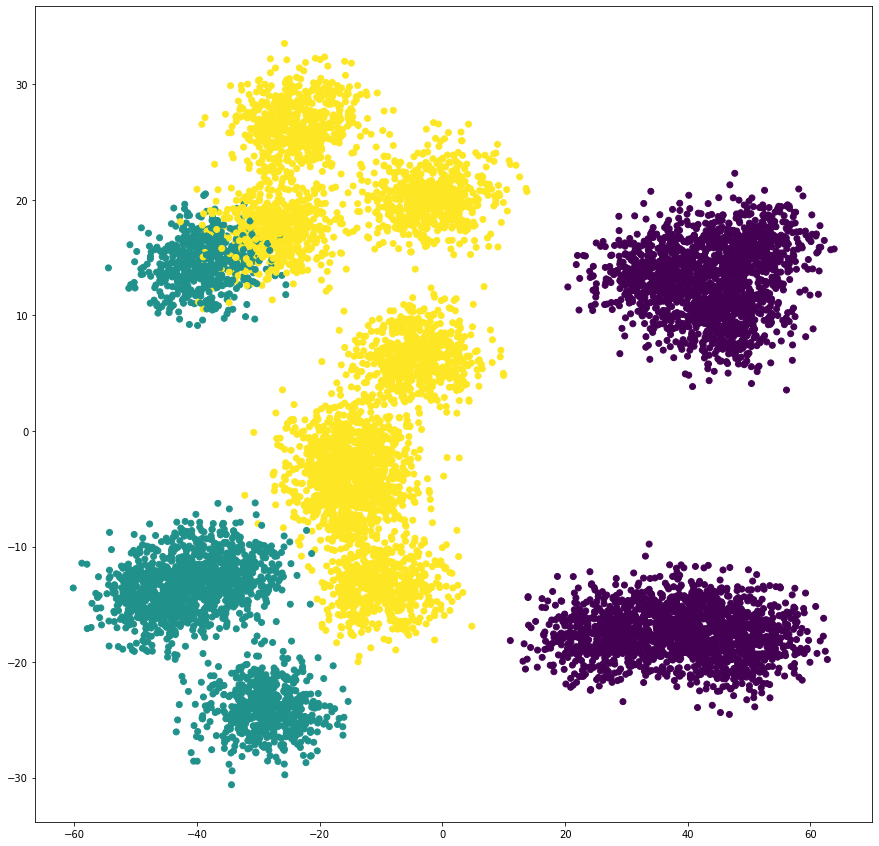

In [151]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=H)

หาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data

**การหาค่า k ด้วยวิธี " The elbow method "**

In [143]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

10702262.182147296

In [144]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [145]:
SSE

[21731535.631323054,
 12416307.521962563,
 10702262.182147296,
 9562086.00100026,
 8580416.365484318,
 7614252.230429327,
 6795369.177308947,
 5943277.096330681]

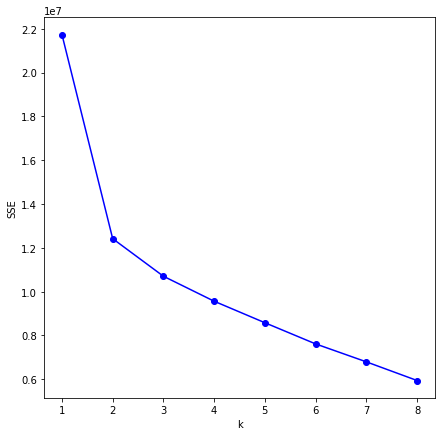

In [156]:
#นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[7,7] 
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

**จากกราฟบอกได้ว่า k มีทั้งหมด 2 กลุ่ม พิจารณาจากกราฟ หลังจากจุดที่ 2 เป็นต้นไปเริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้เคียงกัน**

**การหาค่า k ด้วยวิธี " The silhouette coefficient "**

In [147]:
from sklearn import metrics #import function metrics 

In [148]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

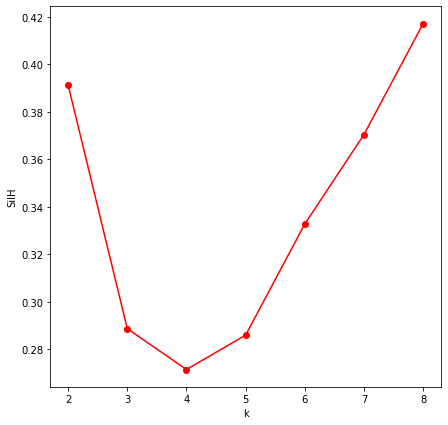

In [157]:
matplotlib.rcParams['figure.figsize']=[7,7]
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')
plt.xlabel('k')
plt.ylabel('SilH');

**จากกราฟบอกได้ว่า k มีทั้งหมด 3 กลุ่ม พิจารณาจากกราฟมีจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2, 3 และ 6**

***พิจารณาจากกราฟ The elbow method และ The silhouette coefficient***

***เพื่อหาค่า k ที่เหมาะสม พบว่าได้ค่า k ที่เหมาะสมคือ k = 2 และ 3 เราจึงเลือกใช้ k = 3 ในการจัดกลุ่มของ Data***

### **ทดลองนำค่า ที่ได้มาเเบ่งกลุ่ม**


In [158]:
matplotlib.rcParams['figure.figsize']=[15,15]

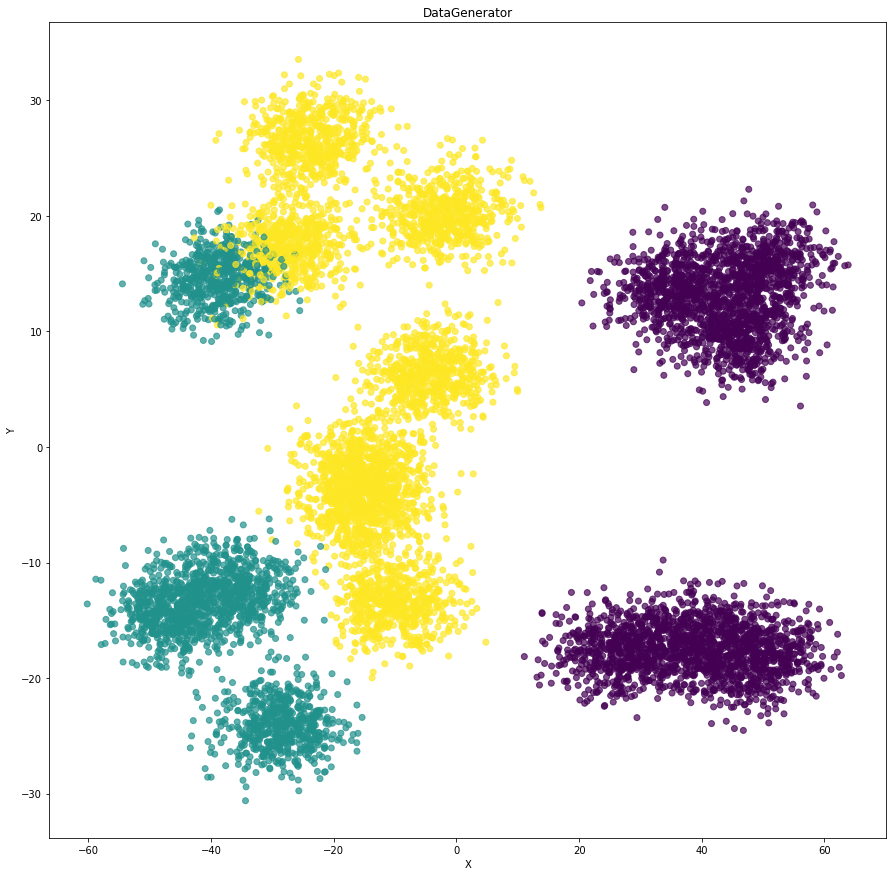

In [159]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
H = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**จากกราฟที่ได้ พบว่าเมื่อแบ่งกลุ่มข้อมูลออกเป็น 3 กลุ่ม จะได้กลุ่มของข้อมูลดังกราฟข้างต้น**

## **3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

การลด Dimention ของข้อมูลสามารถทำได้ 3 วิธีคือ

  1. PCA : Principle Component Analysis
  2. MDS : Multidimensional Scaling
  3. Factor Analysis

โดยเลือกใช้วิธีการลด Dimension ของข้อมูลด้วยวิธี MDS 

**MDS ลด Dimention ของข้อมูล**

In [160]:
from sklearn.manifold import MDS

In [161]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [162]:
new_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

**K-mean**

In [163]:
kmeans2 = KMeans(n_clusters=3) #กำหนดกลุ่ม k = 3 ตามการหาค่า k ที่เหมาะสมข้างต้น 
kmeans2.fit(Data) 
G = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น G

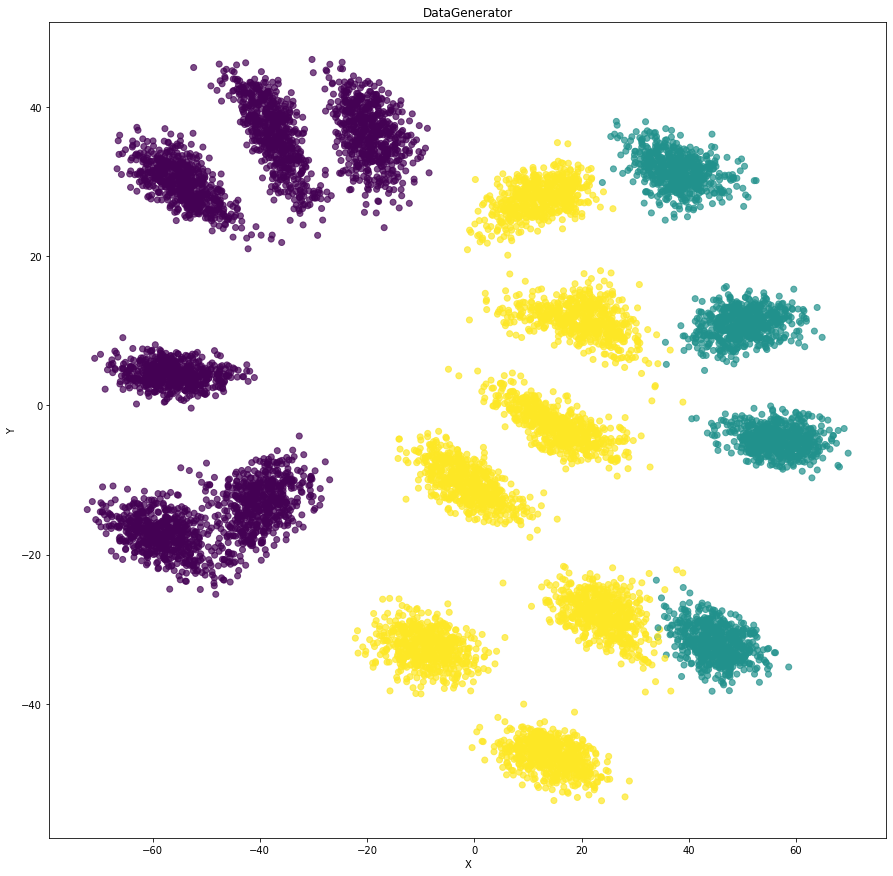

In [165]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=G,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

## **4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

**พิจารณากราฟจากข้อ 2**

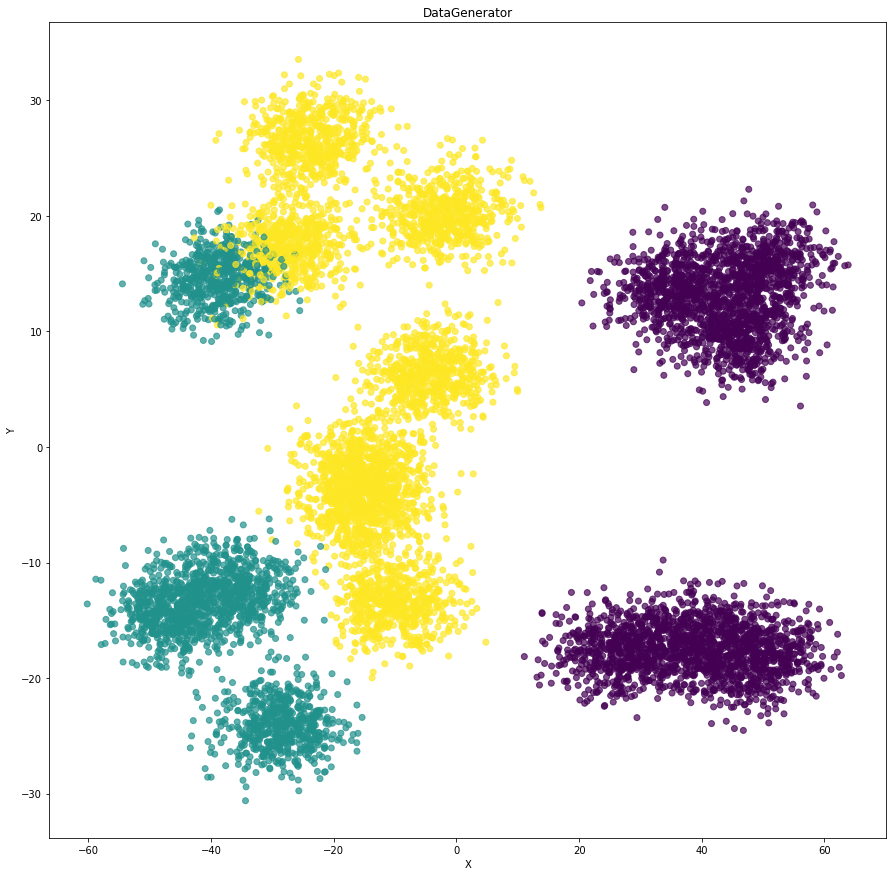

In [166]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**พิจารณากราฟจากข้อ 3**

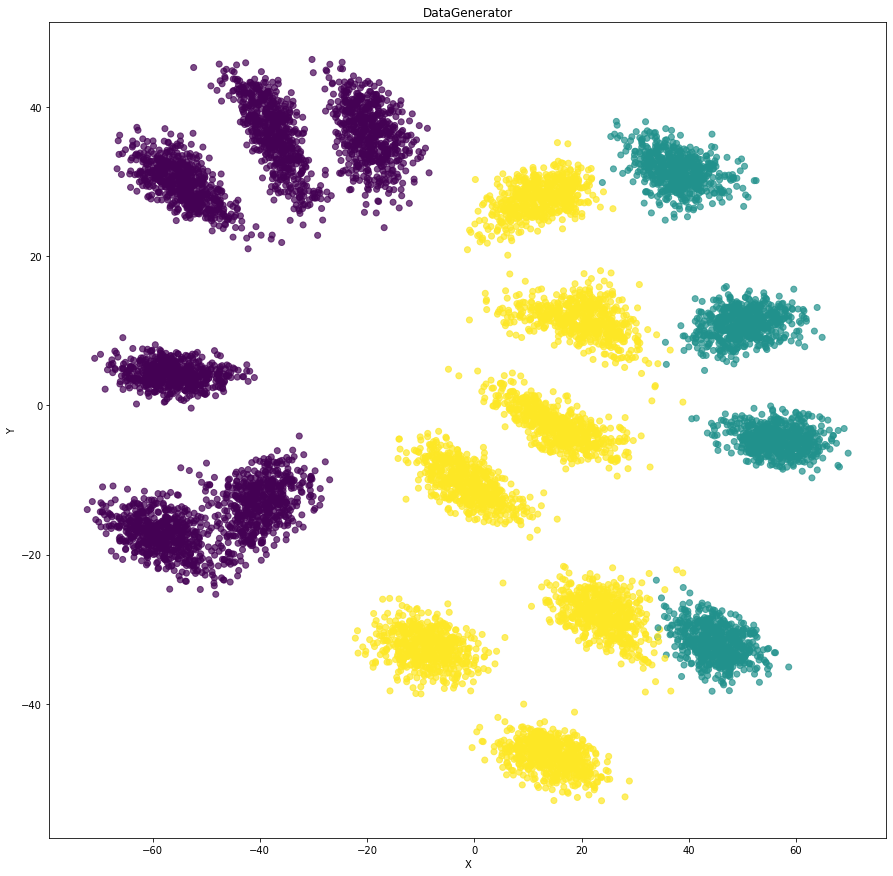

In [168]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=G,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**จากการเปรียบเทียบกราฟข้อ 2 และข้อ 3 พบว่าการกระจายของข้อมูลแตกต่างกัน**

  ข้อที่ 2 มีการจัดกลุ่มโดยการ clustering ก่อนที่จะทำการลด Dimention ด้วยวิธี PCA ซึ่งเป็นการลด Dimention ของข้อมูล โดยที่ทุกๆจุดของข้อมูลจะอยู่ที่เดิม แค่เปลี่ยนมุมมอง

  ส่วนข้อ 3 เป็นการลด Dimention ของข้อมูลให้เหลือ 2 มิติก่อน แล้วค่อยนำข้อมูลที่ลด  Dimention แล้วไปทำการ clustering โดยทำการลด Dimention ด้วยวิธี MDS ซึ่งเป็นการลด Dimention ของข้อมูล โดยสนใจระยะห่างระหว่างจุด ทำให้กราฟในข้อ 3 ข้อมูลแยกกันมากกว่าข้อ 2 เมื่อพิจารณาจากกราฟข้อ 2 จะเห็นว่ามีข้อมูลบางส่วนที่ซ้อนทับกันอยู่